## Car Purchasing Model using Linear Regression
You are working as a data scientist in an automobile company.
You would like to develop a model to predict the total amount that customers are willing to pay for the new car. This information will be used by the company to do the targeted marketing based on the customer profile.

In [30]:
# load libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# load dataset
car_df = pd.read_csv('data/Car_Purchasing_Data.csv')
car_df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


First, I will check for missing data and also take a look at the unique data

In [4]:
car_df.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [5]:
car_df.nunique()

Customer Name          498
Customer e-mail        500
Country                  1
Gender                   2
Age                     43
Annual Salary          500
Credit Card Debt       500
Net Worth              500
Car Purchase Amount    500
dtype: int64

For data analysis and modeling, I don't need 3 feature columns `Customer Name`, `Customer e-mail`, `Country`. So I will drop those 3 columns.

In [6]:
car1_df = car_df.drop(columns=['Customer Name', 'Customer e-mail', 'Country'], axis=1)
car1_df.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57,59729.15130,5358.712177,560304.0671,55915.46248


Let me now get desciption of the dataset.

In [7]:
car1_df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


#### Visualize the data

<AxesSubplot:>

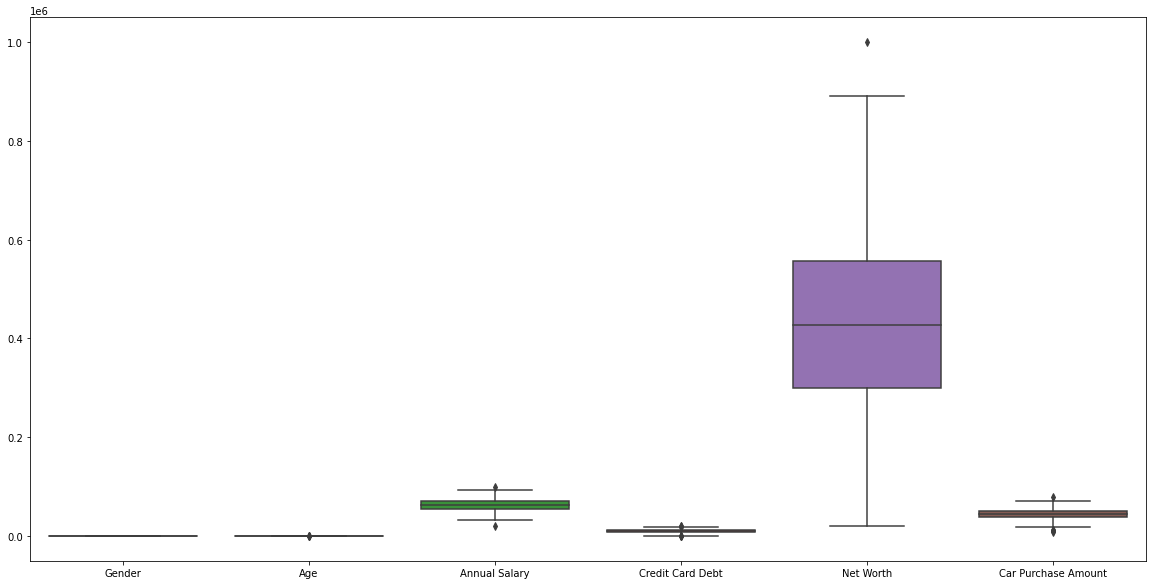

In [10]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=car1_df)

According to me `Net Worth` has maximum variance but is not a deciding factor for the `Car Purchase Amount`, rather `Annual Salary` has a direct impact on `Car Purchase Amount`. To know more I will normalize the dataset and plot a correlation matrix to understand more.

In [13]:
# using MinMaxScaler
scaler = MinMaxScaler()
car1_scaled_df = car1_df
car1_scaled_df[['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth', 'Car Purchase Amount']] = scaler.fit_transform(car1_df)
car1_scaled_df.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0.0,0.44,0.535151,0.578361,0.223430,0.370725
1,0.0,0.42,0.583086,0.476028,0.521402,0.508669
2,1.0,0.46,0.422482,0.555797,0.631089,0.477827
3,1.0,0.76,0.742125,0.719908,0.539387,0.822850
4,1.0,0.74,0.496614,0.264257,0.551331,0.660781


In [14]:
car1_scaled_df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,0.524480,0.526590,0.477771,0.419873,0.495913
std,0.500465,0.159807,0.146292,0.175336,0.177078,0.151735
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.420000,0.429900,0.366709,0.285535,0.403238
50%,1.000000,0.520000,0.536444,0.480153,0.415051,0.492927
75%,1.000000,0.640000,0.626473,0.587883,0.548290,0.595137
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Now let me visualise the correlation between all the columns

<AxesSubplot:>

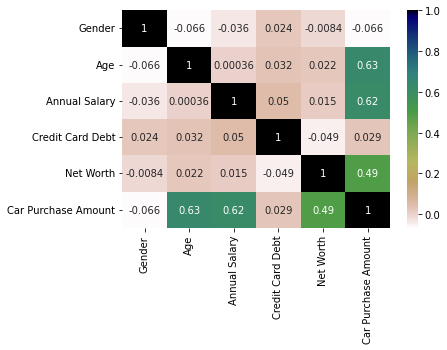

In [19]:
sns.heatmap(car1_scaled_df.corr(), cmap="gist_earth_r", annot=True)

As I have seen that `Annual Salary` has higher correlation to `Car Purchase Amount`, here I can also see that `Age` also has higher correlation to `Car Purchase Amount`.
I will consider `Age` and `Annual Salary` for the predition and then after measuring the performance of the model, I can add / remove more feature.

#### Training and Testing data splitting

In [21]:
# first, I will create feature and target from the dataset
X = car1_scaled_df[['Age', 'Annual Salary']]
y = car1_scaled_df[['Car Purchase Amount']]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (400, 2)
Shape of X_test:  (100, 2)
Shape of y_train:  (400, 1)
Shape of y_test:  (100, 1)


#### Create the model and predict

In [26]:
linear = LinearRegression()

In [27]:
linear.fit(X_train, y_train)

LinearRegression()

In [28]:
car1_y_pred = linear.predict(X_test)

#### Let me now check the model's accuracy and performance
I will calculate RMSE and R squared score

In [32]:
mse = mean_squared_error(y_test, car1_y_pred)
rmse = np.sqrt(mse)

print("RMSE for the Linear model is ", rmse)

r2 = r2_score(y_test, car1_y_pred)
print("R2 score for the Linear model is ", r2)

RMSE for the Linear model is  0.07176895456670289
R2 score for the Linear model is  0.7263230603567118
